<a href="https://colab.research.google.com/github/abdipourasl/CNN/blob/main/projrct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/Pics')
os.listdir('/content/drive/My Drive/Pics')

['norm', 'OCD']

In [ ]:
data_dir= '/content/drive/My Drive/Pics'

In [ ]:
os.listdir(os.path.join(data_dir,'OCD'))

['OCD_1.png',
 'OCD_2.png',
 'OCD_3.png',
 'OCD_4.png',
 'OCD_5.png',
 'OCD_6.png',
 'OCD_7.png',
 'OCD_8.png',
 'OCD_9.png',
 'OCD_10.png',
 'OCD_11.png',
 'OCD_12.png',
 'OCD_13.png',
 'OCD_14.png',
 'OCD_15.png',
 'OCD_16.png',
 'OCD_17.png',
 'OCD_18.png',
 'OCD_19.png',
 'OCD_20.png',
 'OCD_21.png',
 'OCD_22.png',
 'OCD_23.png',
 'OCD_24.png',
 'OCD_25.png',
 'OCD_26.png',
 'OCD_27.png',
 'OCD_28.png',
 'OCD_29.png',
 'OCD_30.png',
 'OCD_31.png',
 'OCD_32.png',
 'OCD_33.png',
 'OCD_34.png',
 'OCD_35.png',
 'OCD_36.png',
 'OCD_37.png',
 'OCD_38.png',
 'OCD_39.png',
 'OCD_40.png',
 'OCD_41.png',
 'OCD_42.png',
 'OCD_43.png',
 'OCD_44.png',
 'OCD_45.png',
 'OCD_46.png',
 'OCD_47.png',
 'OCD_48.png',
 'OCD_49.png',
 'OCD_50.png',
 'OCD_51.png',
 'OCD_52.png',
 'OCD_53.png',
 'OCD_54.png',
 'OCD_55.png',
 'OCD_56.png',
 'OCD_57.png',
 'OCD_58.png',
 'OCD_59.png',
 'OCD_60.png',
 'OCD_61.png',
 'OCD_62.png',
 'OCD_63.png',
 'OCD_64.png',
 'OCD_65.png',
 'OCD_66.png',
 'OCD_67.png',
 'OC

In [ ]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [ ]:
img=cv2.imread(os.path.join('/content/drive/My Drive/Pics','OCD','OCD_855.png'))
img.shape


(630, 782, 3)

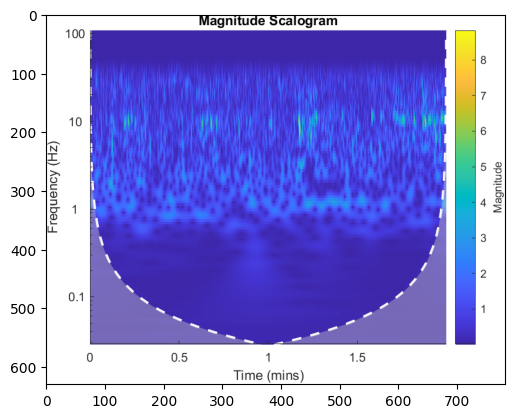

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

# Load Data:

In [ ]:
import numpy as np

In [ ]:
#tf.data.Dataset??

In [ ]:
data= tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Pics')

Found 1710 files belonging to 2 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator= data.as_numpy_iterator()


In [ ]:
batch=data_iterator.next()

In [ ]:
batch[1]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
batch[0].shape

(32, 256, 256, 3)

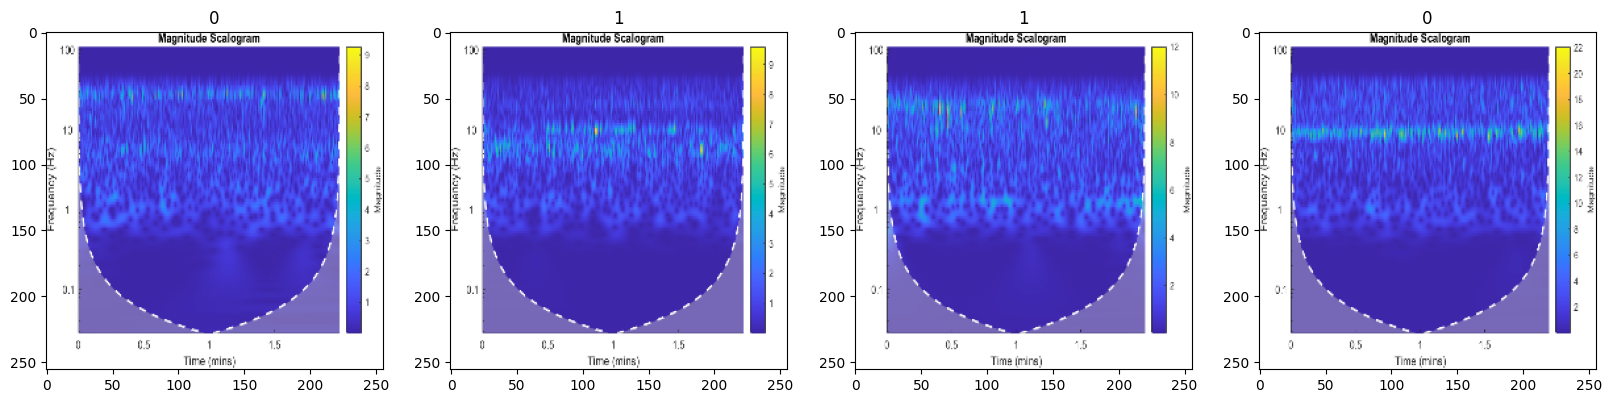

In [ ]:
# 0 = norm
# 1 = OCD


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data:

In [ ]:
data.as_numpy_iterator().next()

(array([[[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.

In [ ]:
data.as_numpy_iterator().next()[0].max()

255.0

In [ ]:
data= data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

# Split Data:

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [ ]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)


# Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
37/37 [==============================] - 134s 4s/step - loss: 0.6905 - accuracy: 0.5380 - val_loss: 0.6908 - val_accuracy: 0.5125
Epoch 2/20
37/37 [==============================] - 135s 4s/step - loss: 0.6757 - accuracy: 0.5870 - val_loss: 0.6723 - val_accuracy: 0.5469
Epoch 3/20
37/37 [==============================] - 135s 4s/step - loss: 0.6579 - accuracy: 0.6056 - val_loss: 0.6512 - val_accuracy: 0.6625
Epoch 4/20
37/37 [==============================] - 135s 4s/step - loss: 0.6335 - accuracy: 0.6529 - val_loss: 0.6592 - val_accuracy: 0.6219
Epoch 5/20
37/37 [==============================] - 134s 4s/step - loss: 0.5981 - accuracy: 0.6630 - val_loss: 0.5977 - val_accuracy: 0.6812
Epoch 6/20
37/37 [==============================] - 113s 3s/step - loss: 0.5747 - accuracy: 0.7002 - val_loss: 0.5869 - val_accuracy: 0.6594
Epoch 7/20
37/37 [==============================] - 132s 4s/step - loss: 0.5105 - accuracy: 0.7568 - val_loss: 0.5115 - val_accuracy: 0.7625
Epoch 8/20
37

In [ ]:
hist.history

{'loss': [0.6905392408370972,
  0.6756930947303772,
  0.657874584197998,
  0.6334955096244812,
  0.5981415510177612,
  0.5746623873710632,
  0.5105324387550354,
  0.44137051701545715,
  0.34538209438323975,
  0.30302050709724426,
  0.2571902871131897,
  0.19839946925640106,
  0.15799321234226227,
  0.11550629138946533,
  0.07848415523767471,
  0.06746820360422134,
  0.038586195558309555,
  0.04247567057609558,
  0.04907645657658577,
  0.0329352505505085],
 'accuracy': [0.5380067825317383,
  0.5869932174682617,
  0.6055743098258972,
  0.6528716087341309,
  0.6630067825317383,
  0.7001689076423645,
  0.7567567825317383,
  0.8048986196517944,
  0.849662184715271,
  0.8699324131011963,
  0.8935810923576355,
  0.9265202879905701,
  0.9358108043670654,
  0.9619932174682617,
  0.9755067825317383,
  0.9780405163764954,
  0.9923986196517944,
  0.9915540814399719,
  0.9839527010917664,
  0.9907094836235046],
 'val_loss': [0.6907628774642944,
  0.6723418235778809,
  0.651166558265686,
  0.6592493

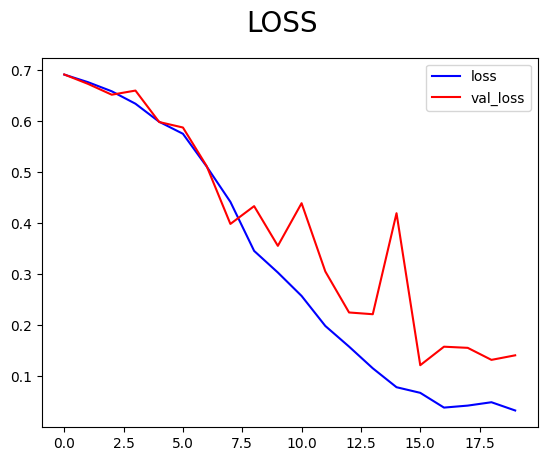

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

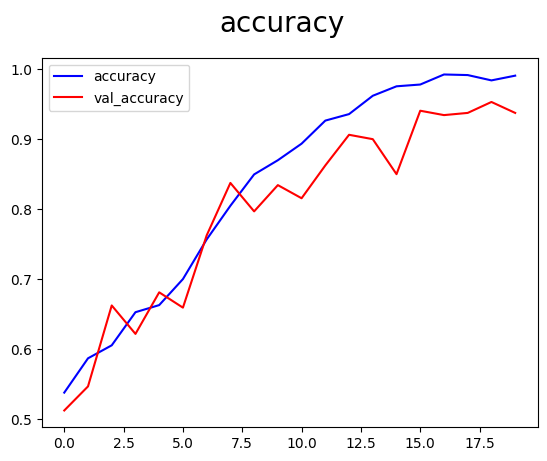

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 577ms/step


In [ ]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 0.9722222089767456 Recall: 0.875  Accuracy : 0.925000011920929 


# Test

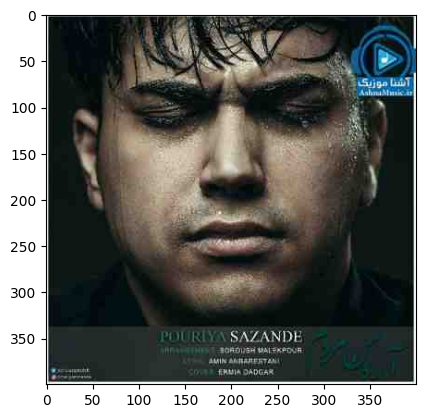

In [ ]:
# Download a new image from Internet for testing model and after that do this codes:
img=cv2.imread('sad.jpg')
# Sad.jpg is the new pic
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

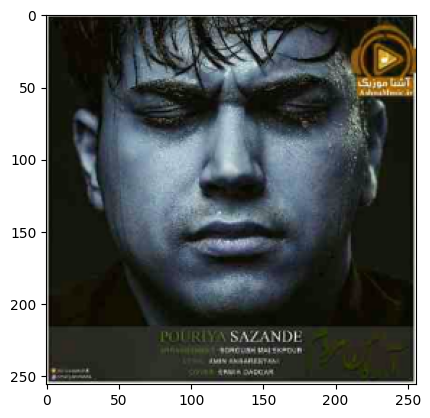

In [ ]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [ ]:
yhat

array([[0.9988863]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print (' this pic is SAD :(')
else:
    print (" this pic is SOOOOOOO HAAAAAPY :)")

 this pic is SAD :(
